In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "S&P500_D_1789-05-01_2025-10-10.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-10-10.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-10-10.csv"

print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

Path exists: True


,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [43]:
# filter DatetimeIndex higher than year 1957
df = df[df.index > '1957-01-01']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17311 entries, 1957-01-02 to 2025-10-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    17311 non-null  float64
 1   high    17311 non-null  float64
 2   low     17311 non-null  float64
 3   close   17311 non-null  float64
 4   volume  17311 non-null  float64
dtypes: float64(5)
memory usage: 811.5 KB


In [44]:
df.shape

(17311, 5)

In [45]:
# # plot close prices over time
# plt.figure(figsize=(14, 7))
# plt.plot(df.index, df['close'], label='Close Price')
# plt.title('S&P 500 Close Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid()
# plt.show()

In [46]:
df.head()

,open,high,low,close,volume
date,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0
1957-01-03,46.60,46.60,46.60,46.60,1255556.0
1957-01-04,46.66,46.66,46.66,46.66,1505556.0
1957-01-07,46.42,46.42,46.42,46.42,1388889.0
1957-01-08,46.25,46.25,46.25,46.25,1238889.0


In [47]:
"""
Simple Trading Strategy based on Overnight Returns

Entry Condition:
Close Price of the current day

Exit Condition:
Open Price of the next day (next_day_open)

Assumptions:
Entry at Close Price and Exit at Open Price the next day is not realistic due to market hours.
We assume we can trade at these prices for the sake of this strategy.
In a real-world scenario, we would need to consider market hours to enter and exit trades few seconds
before market close and few seconds after market open.
""";

# Calculate Overnight Returns
df['next_day_open'] = df['open'].shift(-1)
df['overnight_return'] = (df['next_day_open'] - df['close']) / df['close']

df.head()

,open,high,low,close,volume,next_day_open,overnight_return
date,,,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0,46.60,0.008658
1957-01-03,46.60,46.60,46.60,46.60,1255556.0,46.66,0.001288
1957-01-04,46.66,46.66,46.66,46.66,1505556.0,46.42,-0.005144
1957-01-07,46.42,46.42,46.42,46.42,1388889.0,46.25,-0.003662
1957-01-08,46.25,46.25,46.25,46.25,1238889.0,46.16,-0.001946


In [48]:
# calculate cumulative returns
df['cumulative_overnight_return'] = (1 + df['overnight_return']).cumprod() - 1

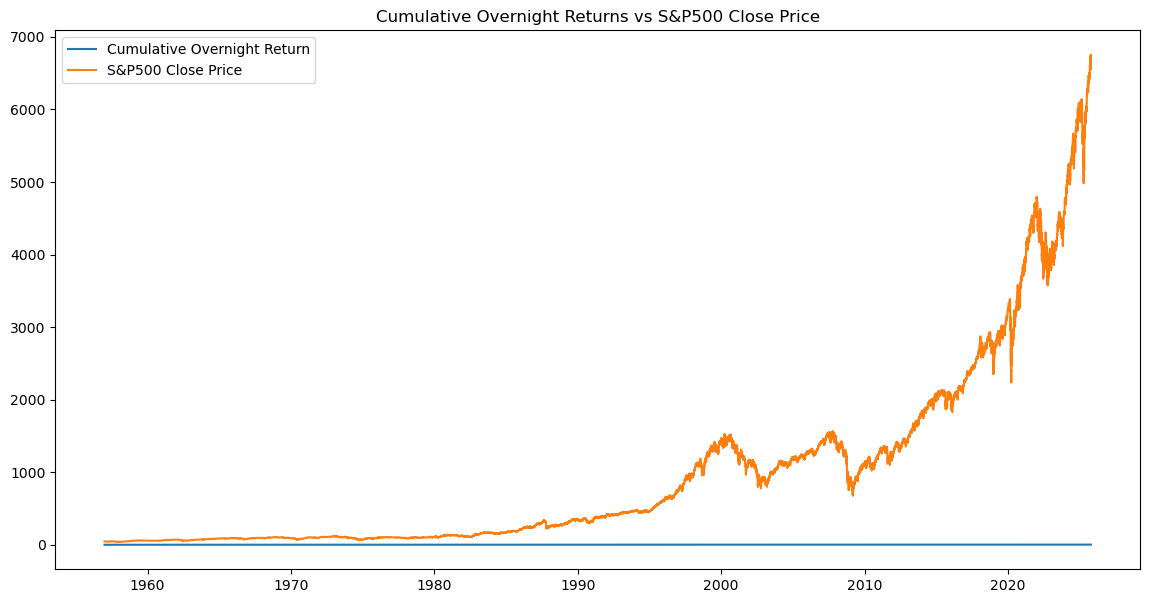

In [49]:
# plot cumulative overnight returns over time vs S&P500 close price
plt.figure(figsize=(14, 7))
plt.plot(df['cumulative_overnight_return'], label='Cumulative Overnight Return')
plt.plot(df['close'], label='S&P500 Close Price')
plt.title('Cumulative Overnight Returns vs S&P500 Close Price')
plt.legend()
plt.show()

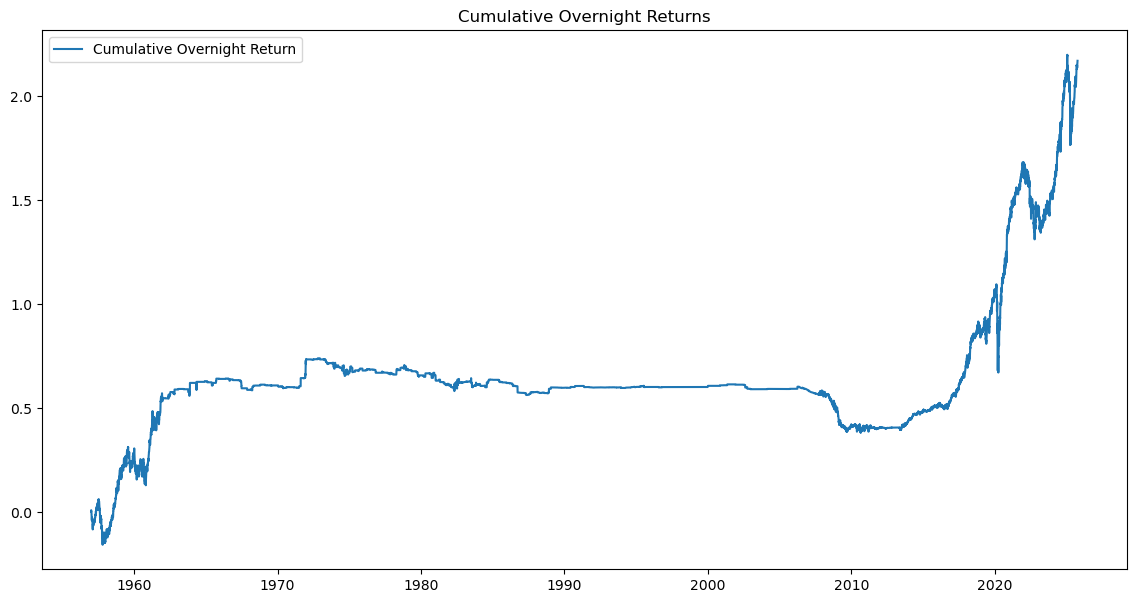

In [50]:
# plot cumulative overnight returns over time
plt.figure(figsize=(14, 7))
plt.plot(df['cumulative_overnight_return'], label='Cumulative Overnight Return')
plt.title('Cumulative Overnight Returns')
plt.legend()
plt.show()

In [51]:
# add rolling statistics of cumulative overnight returns
df['rolling_mean_30'] = df['cumulative_overnight_return'].rolling(window=30).mean()
df['rolling_std_30'] = df['cumulative_overnight_return'].rolling(window=30).std()
df['rolling_mean_90'] = df['cumulative_overnight_return'].rolling(window=90).mean()
df['rolling_std_90'] = df['cumulative_overnight_return'].rolling(window=90).std()
df['rolling_mean_180'] = df['cumulative_overnight_return'].rolling(window=180).mean()
df['rolling_std_180'] = df['cumulative_overnight_return'].rolling(window=180).std()
df['rolling_mean_365'] = df['cumulative_overnight_return'].rolling(window=365).mean()
df['rolling_std_365'] = df['cumulative_overnight_return'].rolling(window=365).std()
df['rolling_mean_3y'] = df['cumulative_overnight_return'].rolling(window=365*3).mean()
df['rolling_std_3y'] = df['cumulative_overnight_return'].rolling(window=365*3).std()
df['rolling_mean_5y'] = df['cumulative_overnight_return'].rolling(window=365*5).mean()
df['rolling_std_5y'] = df['cumulative_overnight_return'].rolling(window=365*5).std()
df['rolling_mean_10y'] = df['cumulative_overnight_return'].rolling(window=365*10).mean()
df['rolling_std_10y'] = df['cumulative_overnight_return'].rolling(window=365*10).std()
df['rolling_mean_20y'] = df['cumulative_overnight_return'].rolling(window=365*20).mean()
df['rolling_std_20y'] = df['cumulative_overnight_return'].rolling(window=365*20).std()
df.head()

,open,high,low,close,volume,next_day_open,overnight_return,cumulative_overnight_return,rolling_mean_30,rolling_std_30,...,rolling_mean_365,rolling_std_365,rolling_mean_3y,rolling_std_3y,rolling_mean_5y,rolling_std_5y,rolling_mean_10y,rolling_std_10y,rolling_mean_20y,rolling_std_20y
date,,,,,,,,,,,,,,,,,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0,46.60,0.008658,0.008658,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-03,46.60,46.60,46.60,46.60,1255556.0,46.66,0.001288,0.009957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-04,46.66,46.66,46.66,46.66,1505556.0,46.42,-0.005144,0.004762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-07,46.42,46.42,46.42,46.42,1388889.0,46.25,-0.003662,0.001082,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-08,46.25,46.25,46.25,46.25,1238889.0,46.16,-0.001946,-0.000866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# below to check..

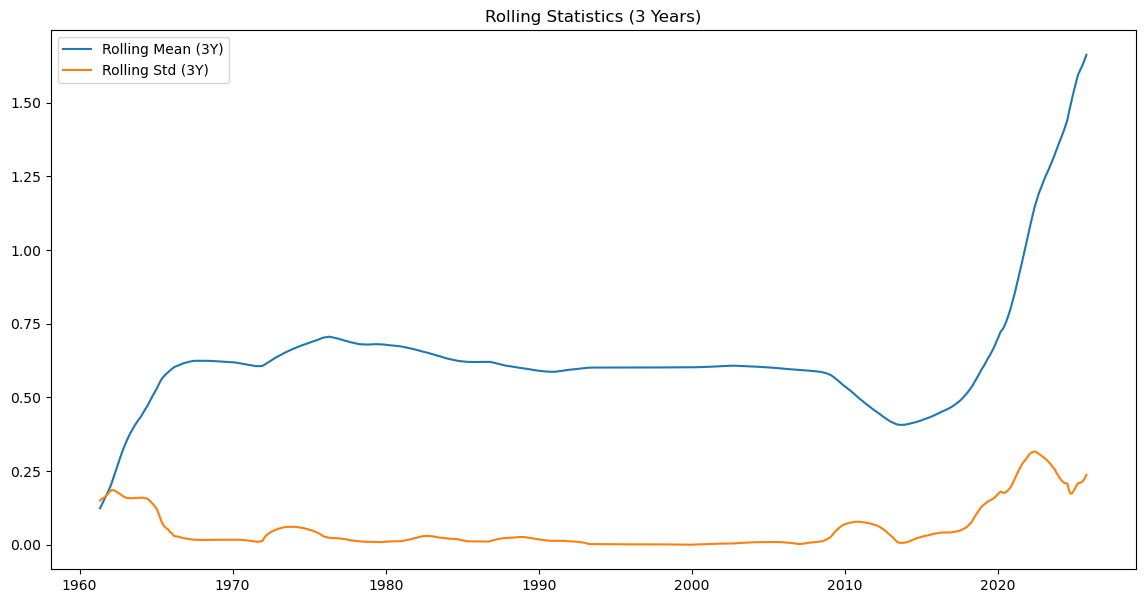

In [53]:
# plot rolling statistics for 3 years
plt.figure(figsize=(14, 7))
plt.plot(df['rolling_mean_3y'], label='Rolling Mean (3Y)')
plt.plot(df['rolling_std_3y'], label='Rolling Std (3Y)')
plt.title('Rolling Statistics (3 Years)')
plt.legend()
plt.show()

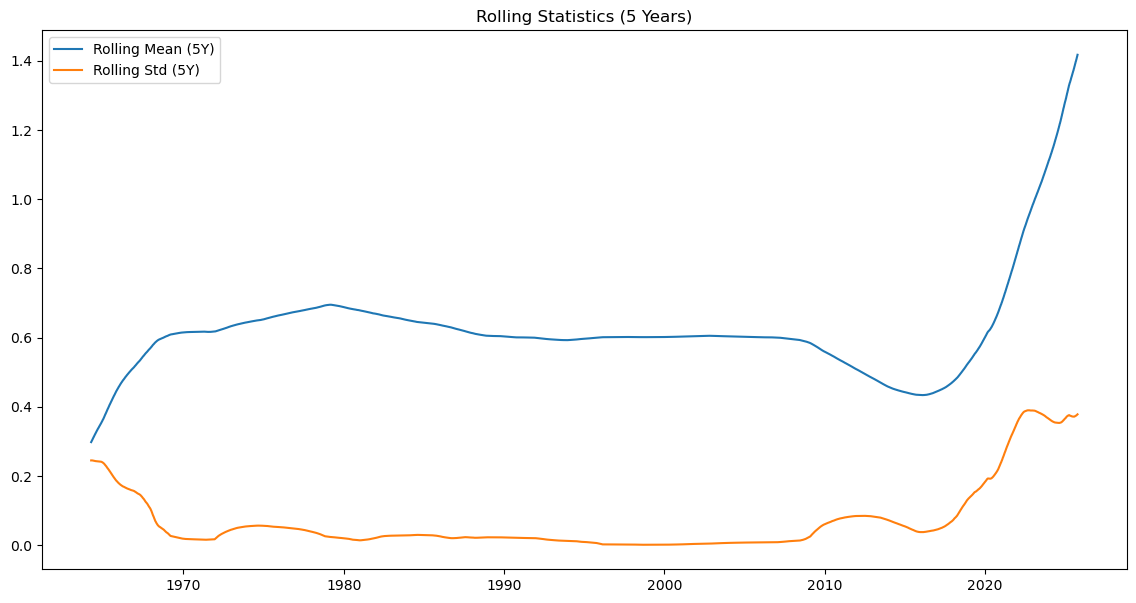

In [54]:
# plot rolling statistics for 5 years
plt.figure(figsize=(14, 7))
plt.plot(df['rolling_mean_5y'], label='Rolling Mean (5Y)')
plt.plot(df['rolling_std_5y'], label='Rolling Std (5Y)')
plt.title('Rolling Statistics (5 Years)')
plt.legend()
plt.show()